In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset provides the list of customer details along with premium payment history.With this we have to predict if the customer will pay the premium on time.'0' on the target column indicates that the customer is not likely to pay the premium on time and vice versa..

In [2]:
#Configurations
file_path=r'C:\Users\Admin\PredictPremiumPayment.xlsx'
col_list=['id','perc_premium_paid_by_cash_credit','age_in_days','Income','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','application_underwriting_score','no_of_premiums_paid','sourcing_channel','residence_area_type','premium','target']

In [3]:
#Read the input file
df=pd.read_excel(file_path)
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


Step1-Data cleaning

In [4]:
#Create a copy of data to work with
customer_data=df.copy()

print(customer_data.isnull().sum())

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64


Late payment details(Count_3-6_months_late  Count_6-12_months_late  Count_more_than_12_months_late) have 97 missing records.
Lets replace these values with 0.
We will ignore 'application_underwriting_score' for now as it has large number of null values.

In [5]:
#check if the id column has unique values
print(len(customer_data.id.unique()))
print(len(customer_data))

79853
79853


In [6]:
#Replace null values in the above identified columns with 0
customer_data[col_list[4]] = customer_data[col_list[4]].fillna(0) 
customer_data[col_list[5]] = customer_data[col_list[5]].fillna(0) 
customer_data[col_list[6]] = customer_data[col_list[6]].fillna(0) 
customer_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                  0
Count_6-12_months_late                 0
Count_more_than_12_months_late         0
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

# Comparing each column with target variable

In [79]:
def calc_perc(colname):
    df1=pd.DataFrame(customer_data.groupby([colname])[col_list[12]].count())
    df2=pd.DataFrame(customer_data.groupby([colname])[col_list[12]].sum())
    df3=pd.merge(df1,df2,on=colname)
    df3.rename(columns={'target_x':'target_total','target_y':'target_1'},inplace=True)
    df3['target_0']=df3['target_total']-df3['target_1']
    df3['perc_ppl_notpaid_prem']=(df3['target_0']/df3['target_total'])*100
    df3=df3.sort_values(by='perc_ppl_notpaid_prem',ascending=False)
    return df3

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
def calc_perc_late_payment_count(colname1,colname2):
    df1=pd.DataFrame(customer_data.groupby([colname1])[colname2])
    df1['perc']=0.0
    for i in range(0,len(df1)):
        df2=df1[1][i]
        total=len(df2)
        df2=df2[df2>0]
        count_greater_than_zero=len(df2)
        df1['perc'][i]=(count_greater_than_zero/total)*100
    df1.rename(columns={0:colname1},inplace=True)
    df1=df1.iloc[:,[0,2]]
    df1=df1.sort_values(by='perc',ascending=False)
    return df1

In [10]:
customer_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [11]:
#Converting age to years
customer_data['Age']=customer_data[col_list[2]]/365
customer_data=customer_data.drop(col_list[2],axis=1)
customer_data['Age']=customer_data['Age'].round()
customer_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,Age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.0
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59.0
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48.0
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.0
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86.0


In [12]:
#Comparing age with target column
bins=[20,30,40,50,60,70,80,90,100,110]
labels = ['Q'+str(i+1) for i in range(0,9)]
print(labels)
customer_data['Age_disc']=pd.cut(customer_data['Age'],bins=bins)
customer_data['Age_disc_labels']=pd.cut(customer_data['Age'],bins=bins,labels=labels)
customer_data.head()

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']


,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,Age,Age_disc,Age_disc_labels
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.0,"(30, 40]",Q2
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59.0,"(50, 60]",Q4
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48.0,"(40, 50]",Q3
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.0,"(40, 50]",Q3
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86.0,"(80, 90]",Q7


<AxesSubplot:xlabel='Age_disc_labels', ylabel='count'>

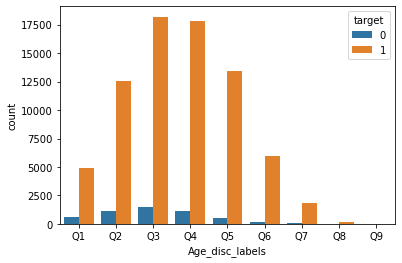

In [13]:
sns.countplot(customer_data.Age_disc_labels,hue=customer_data.target)

In [16]:
df_age=calc_perc('Age_disc')
df_age

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Age_disc,,,,
"(20, 30]",5458,4878,580,10.626603
"(30, 40]",13718,12578,1140,8.310249
"(40, 50]",19678,18195,1483,7.536335
"(50, 60]",18900,17785,1115,5.899471
"(60, 70]",13918,13442,476,3.420032
"(70, 80]",6135,5978,157,2.559087
"(80, 90]",1875,1833,42,2.240000
"(90, 100]",166,162,4,2.409639
"(100, 110]",5,4,1,20.000000


In [17]:
#Comparing age with count_3-6monthslate,count_6-12monthslate,count_morethan12monthslate
df_age1=calc_perc_late_payment_count('Age_disc','Count_3-6_months_late')
df_age2=calc_perc_late_payment_count('Age_disc','Count_6-12_months_late')
df_age3=calc_perc_late_payment_count('Age_disc','Count_more_than_12_months_late')
df_age1,df_age2,df_age3

(     Age_disc       perc
 0    (20, 30]  16.929278
 1    (30, 40]  18.063858
 2    (40, 50]  19.209269
 3    (50, 60]  17.375661
 4    (60, 70]  12.681420
 5    (70, 80]   8.932355
 6    (80, 90]   8.213333
 7   (90, 100]  12.650602
 8  (100, 110]  20.000000,
      Age_disc      perc
 0    (20, 30]  8.629535
 1    (30, 40]  6.604461
 2    (40, 50]  5.462954
 3    (50, 60]  4.703704
 4    (60, 70]  3.096709
 5    (70, 80]  1.955990
 6    (80, 90]  1.493333
 7   (90, 100]  3.012048
 8  (100, 110]  0.000000,
      Age_disc      perc
 0    (20, 30]  6.430927
 1    (30, 40]  6.006707
 2    (40, 50]  5.579835
 3    (50, 60]  4.603175
 4    (60, 70]  3.003305
 5    (70, 80]  1.939690
 6    (80, 90]  1.760000
 7   (90, 100]  3.012048
 8  (100, 110]  0.000000)

We can observe that large percentage of people who have not paid premium on time are in 20 to 60 range and in 100-110 range.But total number of people in 100-110 is very less. 

Text(0, 0.5, 'Target')

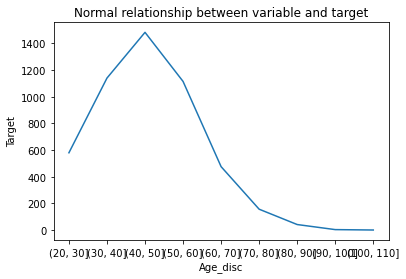

In [18]:
fig = plt.figure()
fig = df_age.iloc[:,2].plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Target')

In [19]:
#Find maximum value of income to include in the bin
customer_data[col_list[3]].max()

90262600

In [20]:
#Comparing Income with target column
bins_income=[0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,90262600]
#customer_data[col_list[3]]=pd.cut(customer_data[col_list[3]],bins=bins_income)
labels_income = ['<10l','10-20l','20-30l','30-40l','40-50l','50-60l','60-70l','70-80l','80-90l','90-100l','>100l']

customer_data['Income_disc']=pd.cut(customer_data[col_list[3]],bins=bins_income)
customer_data['Income_disc_labels']=pd.cut(customer_data[col_list[3]],bins=bins_income,labels=labels_income)
customer_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,Age,Age_disc,Age_disc_labels,Income_disc,Income_disc_labels
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.0,"(30, 40]",Q2,"(0, 1000000]",<10l
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59.0,"(50, 60]",Q4,"(0, 1000000]",<10l
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48.0,"(40, 50]",Q3,"(0, 1000000]",<10l
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.0,"(40, 50]",Q3,"(0, 1000000]",<10l
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86.0,"(80, 90]",Q7,"(0, 1000000]",<10l


<AxesSubplot:xlabel='Income_disc_labels', ylabel='count'>

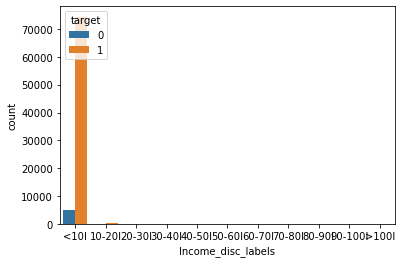

In [21]:
sns.countplot(customer_data.Income_disc_labels,hue=customer_data.target)

In [22]:
df_income=calc_perc('Income_disc_labels')
df_income

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Income_disc_labels,,,,
<10l,79355,74381,4974,6.268036
10-20l,370,353,17,4.594595
20-30l,74,69,5,6.756757
30-40l,24,24,0,0.000000
40-50l,4,4,0,0.000000
50-60l,4,4,0,0.000000
60-70l,2,2,0,0.000000
70-80l,6,4,2,33.333333
80-90l,1,1,0,0.000000


We can observe that 0-30 lakhs range has around 5-6 percent of people not paying premium on time.Also 70-80 lakhs range has 30 percent not paying premium on time.

In [23]:
#Comparing age with count_3-6monthslate,count_6-12monthslate,count_morethan12monthslate
df_income1=calc_perc_late_payment_count('Income_disc_labels','Count_3-6_months_late')
df_income2=calc_perc_late_payment_count('Income_disc_labels','Count_6-12_months_late')
df_income3=calc_perc_late_payment_count('Income_disc_labels','Count_more_than_12_months_late')
df_income1,df_income2,df_income3

(   Income_disc_labels       perc
 0                <10l  16.217000
 1              10-20l  17.297297
 2              20-30l  20.270270
 3              30-40l   8.333333
 4              40-50l  25.000000
 5              50-60l   0.000000
 6              60-70l  50.000000
 7              70-80l  33.333333
 8              80-90l   0.000000
 9             90-100l   0.000000
 10              >100l   9.090909,
    Income_disc_labels       perc
 0                <10l   4.917144
 1              10-20l   4.864865
 2              20-30l   4.054054
 3              30-40l   4.166667
 4              40-50l   0.000000
 5              50-60l   0.000000
 6              60-70l   0.000000
 7              70-80l  16.666667
 8              80-90l   0.000000
 9             90-100l   0.000000
 10              >100l   0.000000,
    Income_disc_labels       perc
 0                <10l   4.668893
 1              10-20l   2.702703
 2              20-30l   2.702703
 3              30-40l   0.000000
 4          

Text(0, 0.5, 'Target')

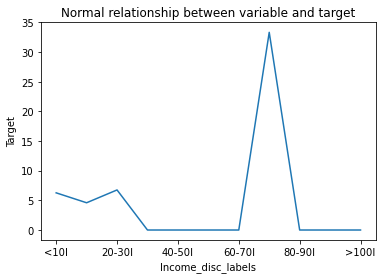

In [24]:
fig = plt.figure()
fig = df_income.iloc[:,3].plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Target')

In [25]:

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   id                                79853 non-null  int64   
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64 
 2   Income                            79853 non-null  int64   
 3   Count_3-6_months_late             79853 non-null  float64 
 4   Count_6-12_months_late            79853 non-null  float64 
 5   Count_more_than_12_months_late    79853 non-null  float64 
 6   application_underwriting_score    76879 non-null  float64 
 7   no_of_premiums_paid               79853 non-null  int64   
 8   sourcing_channel                  79853 non-null  object  
 9   residence_area_type               79853 non-null  object  
 10  premium                           79853 non-null  int64   
 11  target                            79853 non-null  int6

<AxesSubplot:xlabel='Count_3-6_months_late', ylabel='count'>

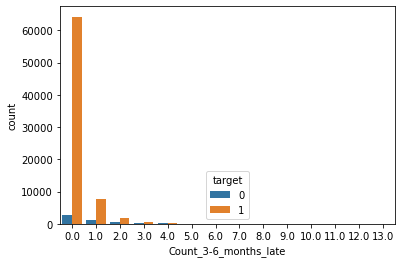

In [26]:
sns.countplot(customer_data['Count_3-6_months_late'],hue=customer_data['target'])

In [27]:
df_3to6mon_late=calc_perc(col_list[4])
df_3to6mon_late

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Count_3-6_months_late,,,,
0.0,66898,64211,2687,4.016563
1.0,8826,7673,1153,13.063676
2.0,2519,1927,592,23.501389
3.0,954,666,288,30.188679
4.0,374,216,158,42.245989
5.0,168,101,67,39.880952
6.0,68,37,31,45.588235
7.0,23,13,10,43.478261
8.0,15,9,6,40.000000


In [28]:
#Comparing count_3-6monthslate with count_6-12monthslate,count_morethan12monthslate columns
##df_income1=calc_perc_late_payment_count('Income_disc_labels','Count_3-6_months_late')
df_3to6mon_late1=calc_perc_late_payment_count('Count_3-6_months_late','Count_6-12_months_late')
df_3to6mon_late2=calc_perc_late_payment_count('Count_3-6_months_late','Count_more_than_12_months_late')
df_3to6mon_late1,df_3to6mon_late2

(    Count_3-6_months_late        perc
 0                     0.0    2.940297
 1                     1.0   11.182869
 2                     2.0   19.690353
 3                     3.0   24.213836
 4                     4.0   35.294118
 5                     5.0   39.285714
 6                     6.0   42.647059
 7                     7.0   34.782609
 8                     8.0   40.000000
 9                     9.0   25.000000
 10                   10.0  100.000000
 11                   11.0  100.000000
 12                   12.0    0.000000
 13                   13.0    0.000000,
     Count_3-6_months_late        perc
 0                     0.0    2.493348
 1                     1.0   10.571040
 2                     2.0   21.873759
 3                     3.0   29.874214
 4                     4.0   41.443850
 5                     5.0   41.666667
 6                     6.0   48.529412
 7                     7.0   47.826087
 8                     8.0   46.666667
 9                     9

We could see that when the count of 3-6 months late is greater than 1,chances of 6-12 months and greater than 12 months late is high.

Text(0, 0.5, 'Target')

<Figure size 432x288 with 0 Axes>

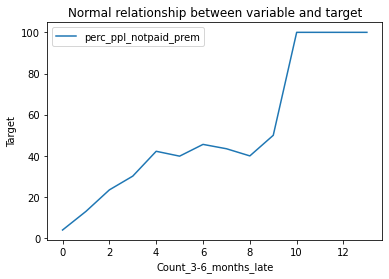

In [29]:
fig = plt.figure()
fig = df_3to6mon_late.iloc[:,[3]].plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Target')

<AxesSubplot:xlabel='Count_6-12_months_late', ylabel='count'>

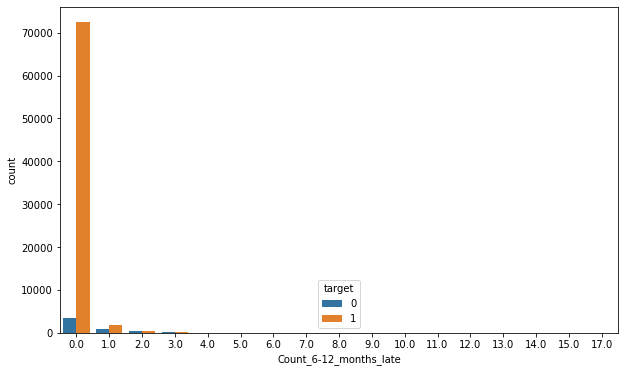

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(customer_data[col_list[5]],hue=customer_data['target'])

In [31]:
df_6to12mon_late=calc_perc(col_list[5])
df_6to12mon_late

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Count_6-12_months_late,,,,
0.0,75928,72423,3505,4.616215
1.0,2680,1852,828,30.895522
2.0,693,359,334,48.196248
3.0,317,132,185,58.359621
4.0,130,45,85,65.384615
5.0,46,16,30,65.217391
6.0,26,13,13,50.000000
7.0,11,4,7,63.636364
8.0,5,2,3,60.000000


In [32]:
#Comparing count_3-6monthslate with count_6-12monthslate,count_morethan12monthslate columns
##df_income1=calc_perc_late_payment_count('Income_disc_labels','Count_3-6_months_late')
df_3to6mon_late1=calc_perc_late_payment_count('Count_6-12_months_late','Count_3-6_months_late')
df_3to6mon_late2=calc_perc_late_payment_count('Count_6-12_months_late','Count_more_than_12_months_late')
df_3to6mon_late1,df_3to6mon_late2

(    Count_6-12_months_late        perc
 0                      0.0   14.483458
 1                      1.0   46.753731
 2                      2.0   53.679654
 3                      3.0   60.883281
 4                      4.0   67.692308
 5                      5.0   60.869565
 6                      6.0   46.153846
 7                      7.0   36.363636
 8                      8.0   40.000000
 9                      9.0   25.000000
 10                    10.0    0.000000
 11                    11.0   50.000000
 12                    12.0  100.000000
 13                    13.0   50.000000
 14                    14.0   50.000000
 15                    15.0  100.000000
 16                    17.0    0.000000,
     Count_6-12_months_late        perc
 0                      0.0    3.379517
 1                      1.0   24.291045
 2                      2.0   38.095238
 3                      3.0   42.902208
 4                      4.0   42.307692
 5                      5.0   39.130435

Text(0, 0.5, 'Target')

<Figure size 432x288 with 0 Axes>

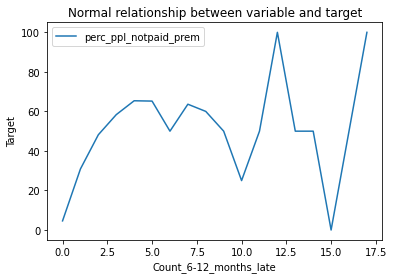

In [33]:
fig = plt.figure()
fig = df_6to12mon_late.iloc[:,[3]].plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Target')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count_more_than_12_months_late', ylabel='count'>

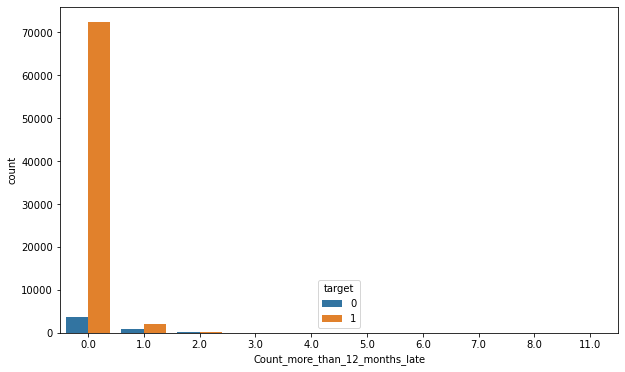

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(customer_data[col_list[6]],hue=customer_data[col_list[12]])

In [34]:
df_morethan12mon_late=calc_perc(col_list[6])
df_morethan12mon_late

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Count_more_than_12_months_late,,,,
0.0,76135,72325,3810,5.004269
1.0,2996,2161,835,27.870494
2.0,498,270,228,45.783133
3.0,151,66,85,56.291391
4.0,48,23,25,52.083333
5.0,13,6,7,53.846154
6.0,6,2,4,66.666667
7.0,3,1,2,66.666667
8.0,2,1,1,50.000000


In [35]:
#Comparing count_3-6monthslate with count_6-12monthslate,count_morethan12monthslate columns
##df_income1=calc_perc_late_payment_count('Income_disc_labels','Count_3-6_months_late')
df_3to6mon_late1=calc_perc_late_payment_count('Count_more_than_12_months_late','Count_3-6_months_late')
df_3to6mon_late2=calc_perc_late_payment_count('Count_more_than_12_months_late','Count_6-12_months_late')
df_3to6mon_late1,df_3to6mon_late2

(   Count_more_than_12_months_late        perc
 0                             0.0   14.323242
 1                             1.0   50.634179
 2                             2.0   70.883534
 3                             3.0   78.145695
 4                             4.0   87.500000
 5                             5.0   84.615385
 6                             6.0   83.333333
 7                             7.0   66.666667
 8                             8.0  100.000000
 9                            11.0    0.000000,
    Count_more_than_12_months_late        perc
 0                             0.0    3.642214
 1                             1.0   27.136182
 2                             2.0   39.759036
 3                             3.0   59.602649
 4                             4.0   77.083333
 5                             5.0   46.153846
 6                             6.0   66.666667
 7                             7.0   33.333333
 8                             8.0  100.000000
 9          

Text(0, 0.5, 'Target')

<Figure size 432x288 with 0 Axes>

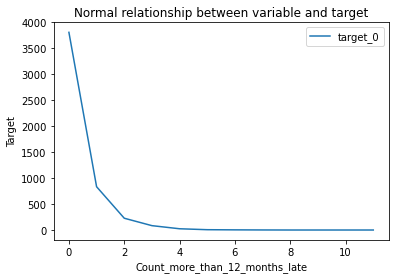

In [36]:
fig = plt.figure()
fig = df_morethan12mon_late.iloc[:,[2]].plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Target')

<AxesSubplot:xlabel='target', ylabel='perc_premium_paid_by_cash_credit'>

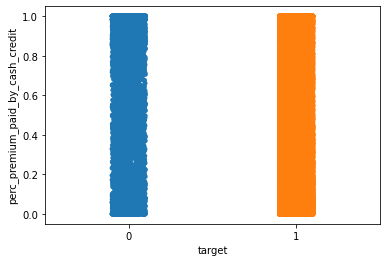

In [37]:
#Analyse percentage of premium paid by cash column with the target variable
#sns.scatterplot(x=customer_data[col_list[1]],y=customer_data[col_list[12]])
sns.stripplot(customer_data[col_list[12]],customer_data[col_list[1]])
#(customer_data[col_list[1]],hue=customer_data['target'])

<AxesSubplot:xlabel='Count_total_premiums_paid_late', ylabel='count'>

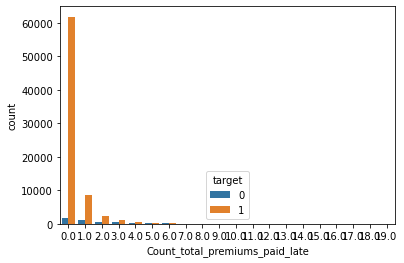

In [80]:
#Analyse total number of premiums delayed with target
sns.countplot(customer_data.Count_total_premiums_paid_late,hue=customer_data.target)

In [82]:
df_tota_prem_paid_late=calc_perc('Count_total_premiums_paid_late')
df_tota_prem_paid_late

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Count_total_premiums_paid_late,,,,
17.0,2,0,2,100.000000
18.0,1,0,1,100.000000
15.0,3,0,3,100.000000
14.0,5,0,5,100.000000
12.0,6,0,6,100.000000
13.0,9,3,6,66.666667
11.0,22,9,13,59.090909
9.0,51,21,30,58.823529
6.0,283,125,158,55.830389


<AxesSubplot:xlabel='sourcing_channel', ylabel='count'>

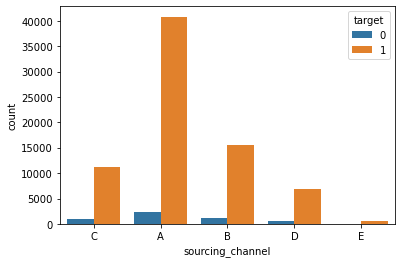

In [83]:
#Analyse total number of premiums delayed with target
sns.countplot(customer_data.sourcing_channel,hue=customer_data.target)

In [84]:
df_sourcing_channel=calc_perc('sourcing_channel')
df_sourcing_channel

,target_total,target_1,target_0,perc_ppl_notpaid_prem
sourcing_channel,,,,
D,7559,6925,634,8.387353
E,609,563,46,7.553366
C,12039,11136,903,7.500623
B,16512,15446,1066,6.455911
A,43134,40785,2349,5.445820


In [38]:
from more_itertools import numeric_range

In [39]:
def calc_range(colName):
    min_value=np.round(customer_data[colName].min(),2)
    max_value=np.round(customer_data[colName].max(),2)
    value_range = max_value - min_value
    
    # let's round the bin width
    inter_value = np.round(value_range/10,2)
    
    #more_itertools.numeric_range(start, stop, step)
    intervals = [i for i in np.round(numeric_range(min_value, max_value+inter_value, inter_value),2)]
    return intervals

In [40]:
intervals=calc_range(col_list[1])
customer_data['perc_premium_paid_by_cash_credit_disc'] = pd.cut(x = customer_data[col_list[1]], bins=intervals, include_lowest=True)
df_percpremium_paid_by_cash=calc_perc('perc_premium_paid_by_cash_credit_disc')
df_percpremium_paid_by_cash

,target_total,target_1,target_0,perc_ppl_notpaid_prem
perc_premium_paid_by_cash_credit_disc,,,,
"(-0.001, 0.1]",32999,32336,663,2.009152
"(0.1, 0.2]",9569,9284,285,2.978368
"(0.2, 0.3]",6454,6209,245,3.796095
"(0.3, 0.4]",5076,4799,277,5.457053
"(0.4, 0.5]",4300,4007,293,6.813953
"(0.5, 0.6]",3614,3295,319,8.826785
"(0.6, 0.7]",3172,2855,317,9.993695
"(0.7, 0.8]",2868,2473,395,13.772664
"(0.8, 0.9]",2987,2524,463,15.500502


In [41]:
#Comparing age with count_3-6monthslate,count_6-12monthslate,count_morethan12monthslate
df_perc_prem_paid_by_cash_credit1=calc_perc_late_payment_count('perc_premium_paid_by_cash_credit_disc','Count_3-6_months_late')
df_perc_prem_paid_by_cash_credit2=calc_perc_late_payment_count('perc_premium_paid_by_cash_credit_disc','Count_6-12_months_late')
df_perc_prem_paid_by_cash_credit3=calc_perc_late_payment_count('perc_premium_paid_by_cash_credit_disc','Count_more_than_12_months_late')
df_perc_prem_paid_by_cash_credit1,df_perc_prem_paid_by_cash_credit2,df_perc_prem_paid_by_cash_credit3

(  perc_premium_paid_by_cash_credit_disc       perc
 0                         (-0.001, 0.1]   8.969969
 1                            (0.1, 0.2]  12.749504
 2                            (0.2, 0.3]  15.664704
 3                            (0.3, 0.4]  18.459417
 4                            (0.4, 0.5]  20.139535
 5                            (0.5, 0.6]  21.555064
 6                            (0.6, 0.7]  24.936948
 7                            (0.7, 0.8]  29.637378
 8                            (0.8, 0.9]  31.536659
 9                            (0.9, 1.0]  29.487179,
   perc_premium_paid_by_cash_credit_disc       perc
 0                         (-0.001, 0.1]   1.603079
 1                            (0.1, 0.2]   2.100533
 2                            (0.2, 0.3]   2.479083
 3                            (0.3, 0.4]   2.935382
 4                            (0.4, 0.5]   4.325581
 5                            (0.5, 0.6]   5.672385
 6                            (0.6, 0.7]   6.273644
 7         

When the percentage of premium paid by cash/credit is high, higher the chances of person paying the premium late.

<AxesSubplot:xlabel='target', ylabel='no_of_premiums_paid'>

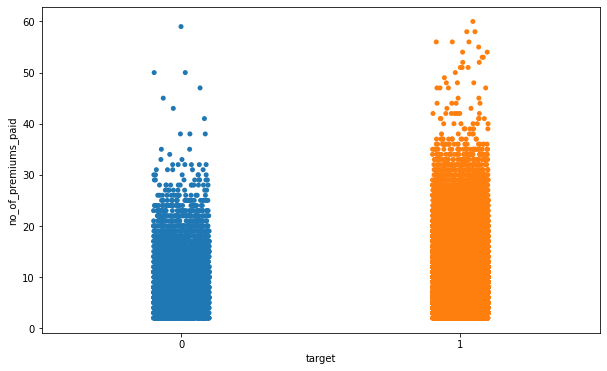

In [42]:
#Analyze number of premiums paid column
plt.figure(figsize=(10,6))
#sns.scatterplot(x=customer_data[col_list[12]],y=customer_data[col_list[8]])
sns.stripplot(customer_data[col_list[12]],customer_data[col_list[8]])

In [43]:
intervals=calc_range(col_list[8])
customer_data['no_of_prem_paid_disc'] = pd.cut(x = customer_data[col_list[8]], bins=intervals, include_lowest=True)
df_no_of_prem_paid=calc_perc('no_of_prem_paid_disc')
df_no_of_prem_paid

,target_total,target_1,target_0,perc_ppl_notpaid_prem
no_of_prem_paid_disc,,,,
"(1.999, 7.8]",21852,20108,1744,7.980963
"(7.8, 13.6]",37769,35810,1959,5.186793
"(13.6, 19.4]",15232,14277,955,6.269695
"(19.4, 25.2]",3879,3614,265,6.831658
"(25.2, 31.0]",850,796,54,6.352941
"(31.0, 36.8]",186,175,11,5.913978
"(36.8, 42.6]",46,42,4,8.695652
"(42.6, 48.4]",18,15,3,16.666667
"(48.4, 54.2]",13,11,2,15.384615


In [176]:
#Comparing age with count_3-6monthslate,count_6-12monthslate,count_morethan12monthslate
df_no_of_prem_paid1=calc_perc_late_payment_count('no_of_prem_paid_disc','Count_3-6_months_late')
df_no_of_prem_paid2=calc_perc_late_payment_count('no_of_prem_paid_disc','Count_6-12_months_late')
df_no_of_prem_paid3=calc_perc_late_payment_count('no_of_prem_paid_disc','Count_more_than_12_months_late')
df_no_of_prem_paid1,df_no_of_prem_paid2,df_no_of_prem_paid3

(  no_of_prem_paid_disc       perc
 0         (1.999, 7.8]  13.280249
 1          (7.8, 13.6]  16.026371
 2         (13.6, 19.4]  19.301471
 3         (19.4, 25.2]  21.319928
 4         (25.2, 31.0]  20.352941
 5         (31.0, 36.8]  24.193548
 6         (36.8, 42.6]  17.391304
 7         (42.6, 48.4]  33.333333
 8         (48.4, 54.2]   7.692308
 9         (54.2, 60.0]   0.000000,
   no_of_prem_paid_disc      perc
 0         (1.999, 7.8]  8.896211
 1          (7.8, 13.6]  3.653790
 2         (13.6, 19.4]  3.170956
 3         (19.4, 25.2]  2.474865
 4         (25.2, 31.0]  1.647059
 5         (31.0, 36.8]  4.301075
 6         (36.8, 42.6]  0.000000
 7         (42.6, 48.4]  0.000000
 8         (48.4, 54.2]  0.000000
 9         (54.2, 60.0]  0.000000,
   no_of_prem_paid_disc      perc
 0         (1.999, 7.8]  5.862164
 1          (7.8, 13.6]  4.196563
 2         (13.6, 19.4]  4.300158
 3         (19.4, 25.2]  4.202114
 4         (25.2, 31.0]  2.941176
 5         (31.0, 36.8]  4.301075
 

When the number of premiums paid till date is greater than 30, the chances of delay in the greater than 6 months range is less.

<AxesSubplot:xlabel='residence_area_type', ylabel='count'>

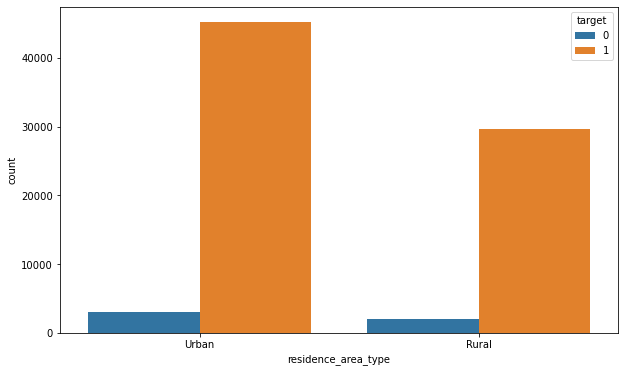

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(customer_data[col_list[10]],hue=customer_data[col_list[12]])

In [45]:
df_residencetype=calc_perc(col_list[10])
df_residencetype

,target_total,target_1,target_0,perc_ppl_notpaid_prem
residence_area_type,,,,
Rural,31670,29672,1998,6.308810
Urban,48183,45183,3000,6.226262


In [46]:
df_residencetype1=calc_perc_late_payment_count(col_list[10],col_list[4])
df_residencetype2=calc_perc_late_payment_count(col_list[10],col_list[4])
df_residencetype3=calc_perc_late_payment_count(col_list[10],col_list[4])
df_residencetype1,df_residencetype2,df_residencetype3

(  residence_area_type       perc
 0               Rural  16.018314
 1               Urban  16.358467,
   residence_area_type       perc
 0               Rural  16.018314
 1               Urban  16.358467,
   residence_area_type       perc
 0               Rural  16.018314
 1               Urban  16.358467)

Percentage of people in both the residence categories is the same.

<AxesSubplot:xlabel='target', ylabel='premium'>

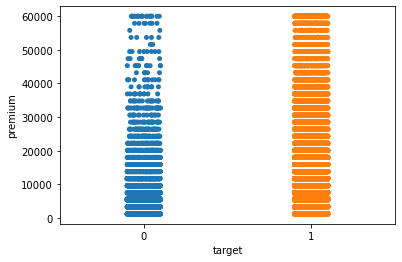

In [47]:
#Analyse premium amount column with the target variable
#sns.scatterplot(x=customer_data[col_list[11]],y=customer_data[col_list[12]])
sns.stripplot(customer_data[col_list[12]],customer_data[col_list[11]])
#(customer_data[col_list[1]],hue=customer_data['target'])

In [48]:
Premium_range=customer_data[col_list[11]].max() - customer_data[col_list[11]].min()
# now let's capture the lower and upper boundaries

min_value = int(np.floor(customer_data[col_list[11]].min()))
max_value = int(np.ceil(customer_data[col_list[11]].max()))

# let's round the bin width
inter_value = int(np.round(Premium_range/10))

print(min_value, max_value, inter_value)

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
print(intervals)

1200 60000 5880
[1200, 7080, 12960, 18840, 24720, 30600, 36480, 42360, 48240, 54120, 60000]


In [49]:
#Comparing premium with target column
#customer_data[col_list[3]]=pd.cut(customer_data[col_list[3]],bins=bins_income)
customer_data['Premium_disc']=pd.cut(customer_data[col_list[11]],bins=intervals)
labels=['1-7k','7-12k','12-18k','18-24k','24-30k','30-36k','36-42k','42-48k','48-54k','54-60k']
customer_data['Premium_disc_labels']=pd.cut(customer_data[col_list[11]],bins=intervals,labels=labels)
customer_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,...,target,Age,Age_disc,Age_disc_labels,Income_disc,Income_disc_labels,perc_premium_paid_by_cash_credit_disc,no_of_prem_paid_disc,Premium_disc,Premium_disc_labels
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,...,1,33.0,"(30, 40]",Q2,"(0, 1000000]",<10l,"(0.4, 0.5]","(7.8, 13.6]","(1200, 7080]",1-7k
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,...,1,59.0,"(50, 60]",Q4,"(0, 1000000]",<10l,"(-0.001, 0.1]","(19.4, 25.2]","(12960, 18840]",12-18k
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,...,0,48.0,"(40, 50]",Q3,"(0, 1000000]",<10l,"(0.9, 1.0]","(1.999, 7.8]","(1200, 7080]",1-7k
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,...,1,42.0,"(40, 50]",Q3,"(0, 1000000]",<10l,"(-0.001, 0.1]","(7.8, 13.6]","(7080, 12960]",7-12k
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,...,1,86.0,"(80, 90]",Q7,"(0, 1000000]",<10l,"(-0.001, 0.1]","(7.8, 13.6]","(7080, 12960]",7-12k


<AxesSubplot:xlabel='Premium_disc_labels', ylabel='count'>

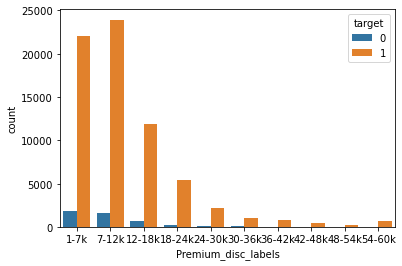

In [50]:
sns.countplot(customer_data.Premium_disc_labels,hue=customer_data[col_list[12]])

In [51]:
df_prem_amnt=calc_perc('Premium_disc_labels')
df_prem_amnt

,target_total,target_1,target_0,perc_ppl_notpaid_prem
Premium_disc_labels,,,,
1-7k,23860,22058,1802,7.552389
7-12k,25445,23894,1551,6.095500
12-18k,12441,11816,625,5.023712
18-24k,5629,5361,268,4.761059
24-30k,2330,2230,100,4.291845
30-36k,1080,1025,55,5.092593
36-42k,825,791,34,4.121212
42-48k,433,409,24,5.542725
48-54k,252,237,15,5.952381


In [52]:
df_prem_amnt1=calc_perc_late_payment_count('Premium_disc_labels',col_list[4])
df_prem_amnt2=calc_perc_late_payment_count('Premium_disc_labels',col_list[5])
df_prem_amnt3=calc_perc_late_payment_count('Premium_disc_labels',col_list[6])
df_prem_amnt1,df_prem_amnt2,df_prem_amnt3

(  Premium_disc_labels       perc
 0                1-7k  16.324392
 1               7-12k  16.321478
 2              12-18k  15.955309
 3              18-24k  16.450524
 4              24-30k  14.935622
 5              30-36k  15.740741
 6              36-42k  14.909091
 7              42-48k  15.242494
 8              48-54k  16.269841
 9              54-60k  17.325228,
   Premium_disc_labels      perc
 0                1-7k  6.471081
 1               7-12k  4.833956
 2              12-18k  3.448276
 3              18-24k  3.091135
 4              24-30k  2.489270
 5              30-36k  1.944444
 6              36-42k  2.545455
 7              42-48k  1.847575
 8              48-54k  2.380952
 9              54-60k  3.495441,
   Premium_disc_labels      perc
 0                1-7k  5.222129
 1               7-12k  4.778935
 2              12-18k  3.721566
 3              18-24k  3.783976
 4              24-30k  3.648069
 5              30-36k  3.425926
 6              36-42k  3.3939

In all the premium amount category, percentage of people with delay greater than 6 months is less compared to 3-6 months delay.

Text(0, 0.5, 'Target')

<Figure size 432x288 with 0 Axes>

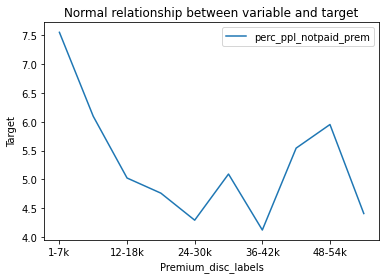

In [53]:
fig = plt.figure()
fig = df_prem_amnt.iloc[:,[3]].plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Target')

<AxesSubplot:>

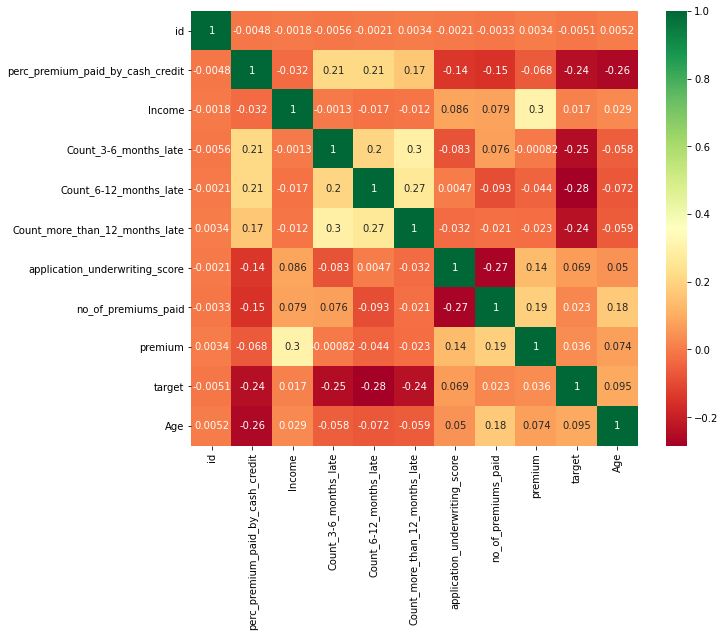

In [54]:
corr=customer_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

In [51]:
customer_data[col_list[6]].value_counts()

0.0     76135
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

In [55]:
customer_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,...,target,Age,Age_disc,Age_disc_labels,Income_disc,Income_disc_labels,perc_premium_paid_by_cash_credit_disc,no_of_prem_paid_disc,Premium_disc,Premium_disc_labels
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,...,1,33.0,"(30, 40]",Q2,"(0, 1000000]",<10l,"(0.4, 0.5]","(7.8, 13.6]","(1200, 7080]",1-7k
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,...,1,59.0,"(50, 60]",Q4,"(0, 1000000]",<10l,"(-0.001, 0.1]","(19.4, 25.2]","(12960, 18840]",12-18k
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,...,0,48.0,"(40, 50]",Q3,"(0, 1000000]",<10l,"(0.9, 1.0]","(1.999, 7.8]","(1200, 7080]",1-7k
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,...,1,42.0,"(40, 50]",Q3,"(0, 1000000]",<10l,"(-0.001, 0.1]","(7.8, 13.6]","(7080, 12960]",7-12k
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,...,1,86.0,"(80, 90]",Q7,"(0, 1000000]",<10l,"(-0.001, 0.1]","(7.8, 13.6]","(7080, 12960]",7-12k


In [56]:
customer_data['Count_total_premiums_paid_late']=customer_data[col_list[4]]+customer_data[col_list[5]]+customer_data[col_list[6]]

Comparing each column with total count of delayed premiums

In [68]:
df_age_total=calc_perc_late_payment_count('Age_disc','Count_total_premiums_paid_late')

In [69]:
df_age_total

,Age_disc,perc
0,"(20, 30]",24.880909
1,"(30, 40]",23.574865
2,"(40, 50]",23.350950
3,"(50, 60]",21.063492
8,"(100, 110]",20.000000
4,"(60, 70]",15.461992
7,"(90, 100]",15.060241
5,"(70, 80]",10.969845
6,"(80, 90]",10.080000


In [66]:
df_income_total=calc_perc_late_payment_count('Income_disc','Count_total_premiums_paid_late')

In [67]:
df_income_total

,Income_disc,perc
6,"(6000000, 7000000]",50.000000
7,"(7000000, 8000000]",33.333333
4,"(4000000, 5000000]",25.000000
2,"(2000000, 3000000]",21.621622
0,"(0, 1000000]",20.301178
1,"(1000000, 2000000]",20.000000
3,"(3000000, 4000000]",12.500000
10,"(10000000, 90262600]",9.090909
5,"(5000000, 6000000]",0.000000
8,"(8000000, 9000000]",0.000000


In [64]:
df_prem_amnt_total=calc_perc_late_payment_count('Premium_disc_labels','Count_total_premiums_paid_late')

In [65]:
df_prem_amnt_total

,Premium_disc_labels,perc
0,1-7k,21.433361
1,7-12k,20.326194
9,54-60k,20.060790
3,18-24k,19.062000
8,48-54k,19.047619
2,12-18k,18.824853
5,30-36k,18.333333
4,24-30k,17.982833
6,36-42k,17.818182
7,42-48k,17.782910


In [70]:
df_perc_prem_cashcredit_total=calc_perc_late_payment_count('perc_premium_paid_by_cash_credit_disc','Count_total_premiums_paid_late')
df_perc_prem_cashcredit_total

,perc_premium_paid_by_cash_credit_disc,perc
9,"(0.9, 1.0]",42.614023
8,"(0.8, 0.9]",37.964513
7,"(0.7, 0.8]",34.937238
6,"(0.6, 0.7]",29.854981
5,"(0.5, 0.6]",26.563365
4,"(0.4, 0.5]",24.023256
3,"(0.3, 0.4]",21.985816
2,"(0.2, 0.3]",18.531143
1,"(0.1, 0.2]",15.111297
0,"(-0.001, 0.1]",10.963969


In [73]:
df_no_prem_paid_total=calc_perc_late_payment_count('no_of_prem_paid_disc','Count_total_premiums_paid_late')
df_no_prem_paid_total

,no_of_prem_paid_disc,perc
7,"(42.6, 48.4]",33.333333
5,"(31.0, 36.8]",26.881720
3,"(19.4, 25.2]",23.949472
4,"(25.2, 31.0]",22.588235
2,"(13.6, 19.4]",22.163866
0,"(1.999, 7.8]",20.377997
6,"(36.8, 42.6]",19.565217
1,"(7.8, 13.6]",19.042072
8,"(48.4, 54.2]",7.692308
9,"(54.2, 60.0]",0.000000


In [74]:
df_sourcing_channel_total=calc_perc_late_payment_count('sourcing_channel','Count_total_premiums_paid_late')

In [75]:
df_sourcing_channel_total

,sourcing_channel,perc
3,D,25.082683
2,C,23.307584
4,E,23.152709
1,B,21.790213
0,A,18.006677


In [78]:
df_residence_area_total=calc_perc_late_payment_count('residence_area_type','Count_total_premiums_paid_late')
df_residence_area_total

,residence_area_type,perc
1,Urban,20.411763
0,Rural,20.123145


In [85]:
#Comparing each column with target
print(df_age)
print(df_income)
print(df_no_of_prem_paid)
print(df_percpremium_paid_by_cash)
print(df_prem_amnt)
print(df_residencetype)
print(df_tota_prem_paid_late)
print(df_sourcing_channel)

            target_total  target_1  target_0  perc_ppl_notpaid_prem
Age_disc                                                           
(20, 30]            5458      4878       580              10.626603
(30, 40]           13718     12578      1140               8.310249
(40, 50]           19678     18195      1483               7.536335
(50, 60]           18900     17785      1115               5.899471
(60, 70]           13918     13442       476               3.420032
(70, 80]            6135      5978       157               2.559087
(80, 90]            1875      1833        42               2.240000
(90, 100]            166       162         4               2.409639
(100, 110]             5         4         1              20.000000
                    target_total  target_1  target_0  perc_ppl_notpaid_prem
Income_disc_labels                                                         
<10l                       79355     74381      4974               6.268036
10-20l                  

no_of_premiums_paid,percpremium_paid_by_cash and total number of late payments are identifed as having impact on target.

In [86]:
customer_data.corr()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target,Age,Count_total_premiums_paid_late
id,1.000000,-0.004833,-0.001798,-0.005643,-0.002117,0.003429,-0.002124,-0.003328,0.003430,-0.005064,0.005183,-0.003598
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.031868,0.213011,0.213953,0.167213,-0.142670,-0.152837,-0.067523,-0.240980,-0.259133,0.280546
Income,-0.001798,-0.031868,1.000000,-0.001296,-0.017292,-0.012341,0.085746,0.079078,0.302825,0.016541,0.029308,-0.011778
Count_3-6_months_late,-0.005643,0.213011,-0.001296,1.000000,0.204286,0.296139,-0.082882,0.076435,-0.000819,-0.246469,-0.057873,0.836357
Count_6-12_months_late,-0.002117,0.213953,-0.017292,0.204286,1.000000,0.266337,0.004726,-0.092593,-0.043642,-0.284034,-0.072439,0.633077
Count_more_than_12_months_late,0.003429,0.167213,-0.012341,0.296139,0.266337,1.000000,-0.031783,-0.021409,-0.023462,-0.238482,-0.059116,0.606434
application_underwriting_score,-0.002124,-0.142670,0.085746,-0.082882,0.004726,-0.031783,1.000000,-0.270864,0.135078,0.068715,0.049883,-0.062726
no_of_premiums_paid,-0.003328,-0.152837,0.079078,0.076435,-0.092593,-0.021409,-0.270864,1.000000,0.191889,0.022664,0.176544,0.005515
premium,0.003430,-0.067523,0.302825,-0.000819,-0.043642,-0.023462,0.135078,0.191889,1.000000,0.036416,0.074069,-0.025804
target,-0.005064,-0.240980,0.016541,-0.246469,-0.284034,-0.238482,0.068715,0.022664,0.036416,1.000000,0.095100,-0.353315


In [87]:
#Write the final output to an excel file
writer = pd.ExcelWriter(r'C:\Users\ADMIN\Desktop\UseCase1_EDAOutput.xlsx')
customer_data.to_excel(writer,index = False, header=True)
writer.save()